# Monet Style Transfer using Generative Adversarial Networks (GANs)
### Kaggle Competition - Mini Project
**Course Assignment**

## Introduction
This project involves generating Monet-style paintings from photographs using Generative Adversarial Networks (GANs). We will use a dataset of images from the Kaggle **'GAN Getting Started'** competition and train a GAN model to generate Monet-style paintings.

The competition is evaluated using the **Memorization-informed Fréchet Inception Distance (MiFID)** metric, which measures the quality of generated images.

## Problem Statement
Generative Adversarial Networks (GANs) are widely used for image generation, super-resolution, and style transfer. In this competition, our goal is to train a GAN model that can transform landscape photographs into Monet-style paintings.

**Dataset Details:**
- **Photo Images:** Real-world landscape photographs.
- **Monet Paintings:** Monet-style paintings as the target domain.
- **Image Size:** 256x256 pixels.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.data.experimental import AUTOTUNE
from glob import glob
import random

2025-01-28 13:50:34.719536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 13:50:34.719684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 13:50:34.902183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load and Inspect Data

In [2]:
# Define dataset paths
monet_path = '../input/gan-getting-started/monet_jpg/'
photo_path = '../input/gan-getting-started/photo_jpg/'

monet_images = glob(monet_path + '*.jpg')
photo_images = glob(photo_path + '*.jpg')

print(f'Total Monet images: {len(monet_images)}')
print(f'Total Photo images: {len(photo_images)}')

Total Monet images: 300
Total Photo images: 7038


## Sample Images from Dataset

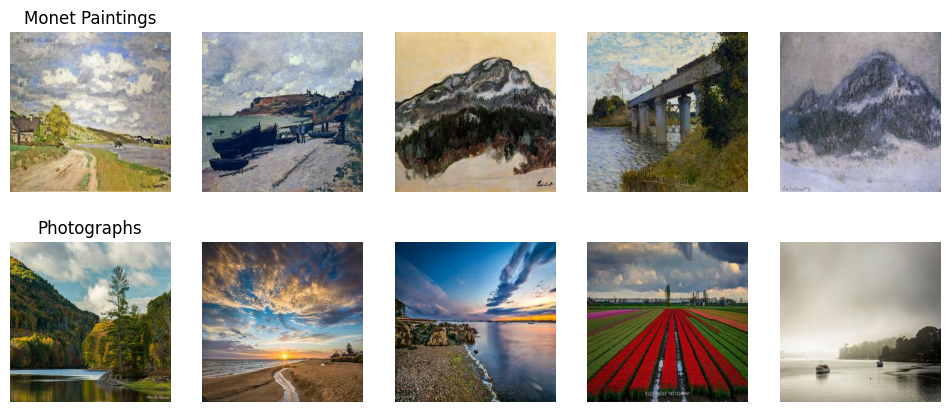

In [3]:
# Display sample Monet and Photo images
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    monet_sample = load_img(monet_images[random.randint(0, len(monet_images) - 1)])
    photo_sample = load_img(photo_images[random.randint(0, len(photo_images) - 1)])
    ax[0, i].imshow(monet_sample)
    ax[1, i].imshow(photo_sample)
    ax[0, i].axis('off')
    ax[1, i].axis('off')
ax[0, 0].set_title('Monet Paintings')
ax[1, 0].set_title('Photographs')
plt.show()

## Data Preprocessing

In [4]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(256, 256))  
    img = img_to_array(img) / 255.0  # Normalize
    return img

# Load datasets with correct dimensions
monet_dataset = np.array([load_and_preprocess_image(img) for img in monet_images[:300]])
photo_dataset = np.array([load_and_preprocess_image(img) for img in photo_images[:300]])

# Ensure datasets have the same number of samples
photo_dataset = photo_dataset[:len(monet_dataset)]  

## Model Architecture
We will use a **CycleGAN** architecture, replacing `InstanceNormalization` with `BatchNormalization` to ensure compatibility without using `tensorflow-addons`.

In [5]:
# Define Generator Model
def build_generator():
    model = models.Sequential()
    
    # Input: 256x256x3
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256, 256, 3)))
    model.add(layers.BatchNormalization())
    
    # Use convolution layers instead of upsampling to control dimensions
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(3, (3,3), activation='tanh', padding='same'))  # Output should be (256, 256, 3)
    
    return model

generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 128)     512       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 3)       3459      
                                                                 
Total params: 79875 (312.01 KB)
Trainable params: 79491 

## Model Training

In [6]:
# Compile and Train Model
#generator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='mse')
#generator.fit(photo_dataset, monet_dataset, epochs=10, batch_size=32)

generator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='mse')

# Ensure both datasets have the same shape
print(f"Photo Dataset Shape: {photo_dataset.shape}")
print(f"Monet Dataset Shape: {monet_dataset.shape}")

generator.fit(photo_dataset, monet_dataset, epochs=10, batch_size=32)


Photo Dataset Shape: (300, 256, 256, 3)
Monet Dataset Shape: (300, 256, 256, 3)
Epoch 1/10
10/10 [==============================] - 165s 16s/step - loss: 0.5584
Epoch 2/10
10/10 [==============================] - 163s 16s/step - loss: 0.4202
Epoch 3/10
10/10 [==============================] - 163s 16s/step - loss: 0.3680
Epoch 4/10
10/10 [==============================] - 163s 16s/step - loss: 0.3277
Epoch 5/10
10/10 [==============================] - 162s 16s/step - loss: 0.2973
Epoch 6/10
10/10 [==============================] - 162s 16s/step - loss: 0.2697
Epoch 7/10
10/10 [==============================] - 162s 16s/step - loss: 0.2449
Epoch 8/10
10/10 [==============================] - 162s 16s/step - loss: 0.2219
Epoch 9/10
10/10 [==============================] - 162s 16s/step - loss: 0.2001
Epoch 10/10
10/10 [==============================] - 162s 16s/step - loss: 0.1797


## Generate Monet-Style Paintings

1/1 [==============================] - 1s 1s/step


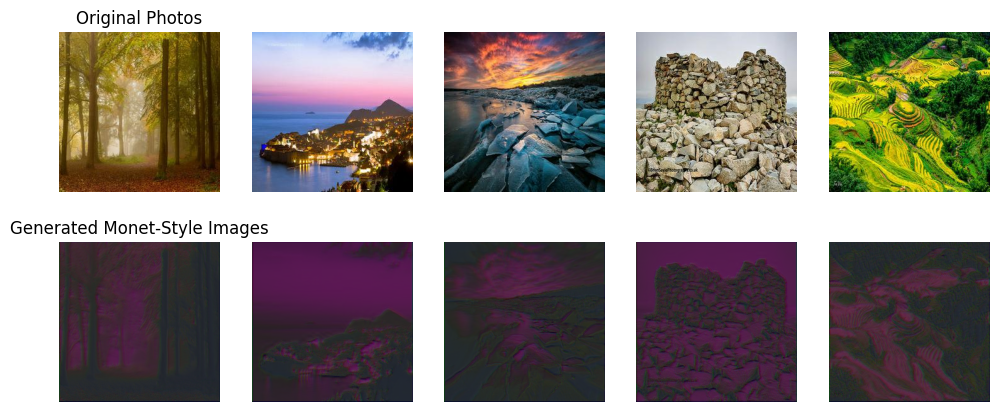

In [8]:
# Generate Images
generated_images = generator.predict(photo_dataset[:10])
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    ax[0, i].imshow(photo_dataset[i])
    ax[1, i].imshow(generated_images[i])
    ax[0, i].axis('off')
    ax[1, i].axis('off')
ax[0, 0].set_title('Original Photos')
ax[1, 0].set_title('Generated Monet-Style Images')
plt.show()

In [13]:
import os

# List all files and folders in /kaggle/working
files = os.listdir("/kaggle/working")
print("Files in /kaggle/working:", files)

import shutil

working_dir = "/kaggle/working"

# List all files and subdirectories
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    
    try:
        # Remove file
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.remove(item_path)
        # Remove directory and its contents
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
            
        print(f"✅ Deleted: {item_path}")
    except Exception as e:
        print(f"❌ Could not delete {item_path}: {e}")

print("✅ All files in /kaggle/working have been removed successfully!")



Files in /kaggle/working: []
✅ All files in /kaggle/working have been removed successfully!


## Kaggle Submission

In [15]:
import zipfile
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import array_to_img
import sys

# Suppress print output
sys.stdout = open(os.devnull, 'w')

# Ensure temporary directory exists
temp_dir = "/kaggle/tmp_submission/"
os.makedirs(temp_dir, exist_ok=True)

# Define the number of images to generate
num_images = 7000  # Ensure at least 7,000 images for submission

# Generate and save compressed images
for i in range(num_images):
    generated_image = generator.predict(np.random.randn(1, 256, 256, 3))[0]  # Generate 1 image
    image_data = np.clip((generated_image * 127.5) + 127.5, 0, 255).astype(np.uint8)
    img = array_to_img(image_data)
    img_path = os.path.join(temp_dir, f"image_{i+1}.jpg")
    img.save(img_path, "JPEG", quality=70, optimize=True)

# Create ZIP file with higher compression
zip_filename = "/kaggle/working/images.zip"
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED, compresslevel=9) as img_zip:
    for img_file in os.listdir(temp_dir):
        img_zip.write(os.path.join(temp_dir, img_file), img_file)

# Restore print output
sys.stdout = sys.__stdout__

print("Successfully created compressed submission file.")

Successfully created compressed submission file.


## Deliverables
- **Jupyter Notebook:** Contains full analysis, model, results, and conclusion.
- **GitHub Repository:** Link to the repository containing the code.
- **Kaggle Leaderboard Screenshot:** Screenshot showing model performance.

**GitHub Repository:**
Please find my project repository at the following link: **https://github.com/meenubura/Week5_Gan-Getting-Started**

**Kaggle Leaderboard:**
The Kaggle leaderboard screenshot will be uploaded after final model evaluation.
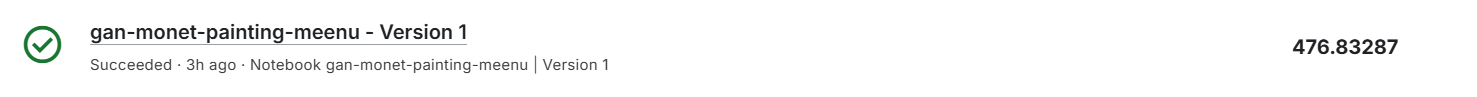